In [1]:
import naverMap
import pandas as pd
import numpy as np
from tqdm import tqdm
from pandas import DataFrame

In [2]:
aiai=pd.read_csv("철새도래지_좌표_최종.csv", encoding='utf-8-sig')

In [3]:
aiai.head()

,index,지역,철새도래지명,시도,시군,위험분류,위험분류 점수,위도,경도,"위도,경도",거리
0,1,서울경기,강서지구,서울특별시,강서구,저위험,3,37.590198,126.813625,"37.5901984197481, 126.81362533492893",0
1,2,서울경기,중랑천,서울특별시,중랑구,중위험,2,37.603083,127.072106,"37.6030830331226, 127.072105737988",0
2,3,서울경기,안양천,서울특별시,양천구,저위험,3,37.513562,126.874612,"37.513562487735406, 126.87461172643478",0
3,4,서울경기,탄천,서울특별시,송파구,중위험,2,37.495083,127.101506,"37.49508293706438, 127.10150560559426",0
4,5,서울경기,원천리천,경기도,수원시,저위험,3,37.264812,127.049762,"37.26481224039535, 127.04976224622416",0


In [4]:
aiai_local=pd.read_csv("전국_occur_hpai.csv", encoding='utf-8-sig')

In [5]:
aiai_local['주소']=aiai_local['시도']+' '+aiai_local['시군구']

In [6]:
aiai_local.head()

,시도,시군구,발생건수,주소
0,서울특별시,종로구,0,서울특별시 종로구
1,서울특별시,중구,0,서울특별시 중구
2,서울특별시,용산구,0,서울특별시 용산구
3,서울특별시,성동구,0,서울특별시 성동구
4,서울특별시,광진구,2,서울특별시 광진구


In [7]:
aiai_local['주소']

0         서울특별시 종로구
1          서울특별시 중구
2         서울특별시 용산구
3         서울특별시 성동구
4         서울특별시 광진구
           ...     
224        경상남도 함양군
225        경상남도 거창군
226        경상남도 합천군
227     제주특별자치도 제주시
228    제주특별자치도 서귀포시
Name: 주소, Length: 229, dtype: object

In [8]:
aiai['위험분류 점수']=aiai['위험분류 점수'].astype('str')

In [9]:
#aiai_local2=pd.DataFrame(columns=['주소']+list(aiai['철새도래지명']+" ,"+aiai['위도,경도']))

In [10]:
aiai_local2=pd.DataFrame(columns=['주소']+list(aiai['철새도래지명']+" "+aiai['위험분류 점수']+','+aiai['위도,경도']))

In [11]:
aiai_local2.head()

,주소,"강서지구 3,37.5901984197481, 126.81362533492893","중랑천 2,37.6030830331226, 127.072105737988","안양천 3,37.513562487735406, 126.87461172643478","탄천 2,37.49508293706438, 127.10150560559426","원천리천 3,37.26481224039535, 127.04976224622416","서호 3,37.280408134249136, 126.98755251443214","안성천 1,36.99139105195746, 127.20539544460591","경안천 2,37.309938272435886, 127.23553552424399","상패천 2,37.91927602221171, 127.05389142205611",...,"목포늪 3,35.56254130753707, 128.40618339231","사지포 3,35.561613790429384, 128.4333952070682","산남저수지 3,35.35126887288887, 128.17443850327453","동판저수지 2,35.30133784622012, 128.68634622602417","화포천 2,35.31163742899077, 128.7875952437551","낙동강 3,35.27987524642292, 129.009763931276","하도리 2,33.51695001412742, 126.8838772052322","용수저수지 2,33.31741751732376, 126.18752882294538","오조리 3,33.463866194337236, 126.91796178149626","종달리 3,33.49242412098807, 126.89071411147393"


In [12]:
aiai_local2['주소']=aiai_local['주소']

In [13]:
aiai_local2.head()

,주소,"강서지구 3,37.5901984197481, 126.81362533492893","중랑천 2,37.6030830331226, 127.072105737988","안양천 3,37.513562487735406, 126.87461172643478","탄천 2,37.49508293706438, 127.10150560559426","원천리천 3,37.26481224039535, 127.04976224622416","서호 3,37.280408134249136, 126.98755251443214","안성천 1,36.99139105195746, 127.20539544460591","경안천 2,37.309938272435886, 127.23553552424399","상패천 2,37.91927602221171, 127.05389142205611",...,"목포늪 3,35.56254130753707, 128.40618339231","사지포 3,35.561613790429384, 128.4333952070682","산남저수지 3,35.35126887288887, 128.17443850327453","동판저수지 2,35.30133784622012, 128.68634622602417","화포천 2,35.31163742899077, 128.7875952437551","낙동강 3,35.27987524642292, 129.009763931276","하도리 2,33.51695001412742, 126.8838772052322","용수저수지 2,33.31741751732376, 126.18752882294538","오조리 3,33.463866194337236, 126.91796178149626","종달리 3,33.49242412098807, 126.89071411147393"
0,서울특별시 종로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 중구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시 용산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울특별시 성동구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울특별시 광진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#aiai['위도,경도']=aiai['위도,경도'].map(lambda x:x.replace(" ",""))

In [15]:
#aiai_local2['위도경도']=aiai['위도,경도']

In [16]:
for i in tqdm(range(len(aiai_local2))):
    address=aiai_local2.loc[i,'주소']
    if address=='세종특별자치시 세종시':
        address='세종특별자치시'
    maps=naverMap.Geocode(address)
    for col in aiai_local2.columns[1:]:
        temp=col.split(',')
        aiai_local2.loc[i,col]=naverMap.direction((float(temp[1]), float(temp[2])), maps)

100%|████████████████████████████████████████████████████████████████████████████████| 229/229 [00:42<00:00,  5.44it/s]


In [17]:
# naverMap?

In [18]:
 aiai_local2.to_csv("시군구_철새도래지거리.csv", encoding='utf-8-sig', index=False)

## 철새도래지-전국 시군구 가까운 순으로 정렬

In [19]:
 aiai_local2.head()

,주소,"강서지구 3,37.5901984197481, 126.81362533492893","중랑천 2,37.6030830331226, 127.072105737988","안양천 3,37.513562487735406, 126.87461172643478","탄천 2,37.49508293706438, 127.10150560559426","원천리천 3,37.26481224039535, 127.04976224622416","서호 3,37.280408134249136, 126.98755251443214","안성천 1,36.99139105195746, 127.20539544460591","경안천 2,37.309938272435886, 127.23553552424399","상패천 2,37.91927602221171, 127.05389142205611",...,"목포늪 3,35.56254130753707, 128.40618339231","사지포 3,35.561613790429384, 128.4333952070682","산남저수지 3,35.35126887288887, 128.17443850327453","동판저수지 2,35.30133784622012, 128.68634622602417","화포천 2,35.31163742899077, 128.7875952437551","낙동강 3,35.27987524642292, 129.009763931276","하도리 2,33.51695001412742, 126.8838772052322","용수저수지 2,33.31741751732376, 126.18752882294538","오조리 3,33.463866194337236, 126.91796178149626","종달리 3,33.49242412098807, 126.89071411147393"
0,서울특별시 종로구,14.68,8.85,11.35,13.9,34.89,32.6,67.76,37.05,39.01,...,257.38,258.68,269.24,295.23,299.04,313.13,451.15,478.65,457.01,453.87
1,서울특별시 중구,16.48,7.88,12.2,11.93,33.57,31.53,66.26,35.19,39.83,...,255.62,256.92,267.59,293.44,297.23,311.29,450.11,477.84,455.95,452.82
2,서울특별시 용산구,16.86,10.64,10.43,10.64,30.23,28.04,63.11,32.88,43.36,...,252.93,254.24,264.65,290.81,294.67,308.85,446.62,474.31,452.46,449.33
3,서울특별시 성동구,19.89,5.39,15.34,9.5,33.23,31.77,65.34,33.2,39.59,...,253.88,255.15,266.19,291.62,295.32,309.24,450.16,478.36,455.98,452.87
4,서울특별시 광진구,24.37,7.23,18.53,5.13,30.58,29.91,61.82,28.8,42.4,...,249.52,250.77,262.1,287.19,290.84,304.66,447.55,476.32,453.34,450.25


In [20]:
aiai_local2=pd.read_csv('시군구_철새도래지거리.csv', encoding='utf-8-sig')
aiai_local2.head()

,주소,"강서지구 3,37.5901984197481, 126.81362533492893","중랑천 2,37.6030830331226, 127.072105737988","안양천 3,37.513562487735406, 126.87461172643478","탄천 2,37.49508293706438, 127.10150560559426","원천리천 3,37.26481224039535, 127.04976224622416","서호 3,37.280408134249136, 126.98755251443214","안성천 1,36.99139105195746, 127.20539544460591","경안천 2,37.309938272435886, 127.23553552424399","상패천 2,37.91927602221171, 127.05389142205611",...,"목포늪 3,35.56254130753707, 128.40618339231","사지포 3,35.561613790429384, 128.4333952070682","산남저수지 3,35.35126887288887, 128.17443850327453","동판저수지 2,35.30133784622012, 128.68634622602417","화포천 2,35.31163742899077, 128.7875952437551","낙동강 3,35.27987524642292, 129.009763931276","하도리 2,33.51695001412742, 126.8838772052322","용수저수지 2,33.31741751732376, 126.18752882294538","오조리 3,33.463866194337236, 126.91796178149626","종달리 3,33.49242412098807, 126.89071411147393"
0,서울특별시 종로구,14.68,8.85,11.35,13.90,34.89,32.60,67.76,37.05,39.01,...,257.38,258.68,269.24,295.23,299.04,313.13,451.15,478.65,457.01,453.87
1,서울특별시 중구,16.48,7.88,12.20,11.93,33.57,31.53,66.26,35.19,39.83,...,255.62,256.92,267.59,293.44,297.23,311.29,450.11,477.84,455.95,452.82
2,서울특별시 용산구,16.86,10.64,10.43,10.64,30.23,28.04,63.11,32.88,43.36,...,252.93,254.24,264.65,290.81,294.67,308.85,446.62,474.31,452.46,449.33
3,서울특별시 성동구,19.89,5.39,15.34,9.50,33.23,31.77,65.34,33.20,39.59,...,253.88,255.15,266.19,291.62,295.32,309.24,450.16,478.36,455.98,452.87
4,서울특별시 광진구,24.37,7.23,18.53,5.13,30.58,29.91,61.82,28.80,42.40,...,249.52,250.77,262.10,287.19,290.84,304.66,447.55,476.32,453.34,450.25


In [21]:
aiai_local2.isnull().sum()

주소                                               0
강서지구 3,37.5901984197481, 126.81362533492893      0
중랑천 2,37.6030830331226, 127.072105737988         0
안양천  3,37.513562487735406, 126.87461172643478    0
탄천 2,37.49508293706438, 127.10150560559426       0
                                                ..
낙동강 3,35.27987524642292, 129.009763931276        0
하도리 2,33.51695001412742, 126.8838772052322       0
용수저수지 2,33.31741751732376, 126.18752882294538    0
오조리 3,33.463866194337236, 126.91796178149626     0
종달리 3,33.49242412098807, 126.89071411147393      0
Length: 104, dtype: int64

In [22]:
for col in aiai_local2.columns[1:]:
    temp=col.split(',')
    aiai_local2=aiai_local2.rename(columns={col:temp[0]})

In [23]:
aiai_local2.columns

Index(['주소', '강서지구 3', '중랑천 2', '안양천  3', '탄천 2', '원천리천 3', '서호 3', '안성천 1',
       '경안천 2', '상패천 2',
       ...
       '목포늪 3', '사지포 3', '산남저수지 3', '동판저수지 2', '화포천 2', '낙동강 3', '하도리 2',
       '용수저수지 2', '오조리 3', '종달리 3'],
      dtype='object', length=104)

In [24]:
#km앞에, 주소가 뒤에 나오게

#각 지점별 거리가 저장된 df
aiai_local2

#결과를 저장할 df 생성
near_order = DataFrame(index = aiai_local2.index,columns = range(len(aiai_local2.columns[1:])))

#column 하나를 기준으로 정렬, 반올림, 문자열로 변환, 
for i in range(len(near_order)):
    temp = pd.DataFrame(aiai_local2.iloc[i])
    temp = temp.iloc[1:].sort_values(by=temp.columns[0])
    temp = temp.astype('str')
    temp = temp.reset_index()
    temp = temp.iloc[:,1]+ ' '+ temp['index']
    near_order.iloc[i,:] = temp
#display(near_order)
#del near_order[0]

near_order.head()


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,8.85 중랑천 2,11.35 안양천 3,13.9 탄천 2,14.68 강서지구 3,19.39 공릉천 1,22.32 한강하구 1,29.06 팔당호 2,29.71 왕송호수 3,32.6 서호 3,34.89 원천리천 3,...,326.15 낙동강하구 2,332.47 금호호 1,335.01 만덕간척지 2,342.37 고천암 2,343.28 강진만 2,346.63 사내간척지 2,451.15 하도리 2,453.87 종달리 3,457.01 오조리 3,478.65 용수저수지 2
1,7.88 중랑천 2,11.93 탄천 2,12.2 안양천 3,16.48 강서지구 3,21.26 공릉천 1,24.24 한강하구 1,27.22 팔당호 2,28.85 왕송호수 3,31.53 서호 3,33.57 원천리천 3,...,324.35 낙동강하구 2,331.67 금호호 1,334.04 만덕간척지 2,341.53 고천암 2,342.3 강진만 2,345.67 사내간척지 2,450.11 하도리 2,452.82 종달리 3,455.95 오조리 3,477.84 용수저수지 2
2,10.43 안양천 3,10.64 중랑천 2,10.64 탄천 2,16.86 강서지구 3,23.71 공릉천 1,25.1 한강하구 1,25.31 왕송호수 3,27.42 팔당호 2,28.04 서호 3,30.23 원천리천 3,...,321.78 낙동강하구 2,328.14 금호호 1,330.53 만덕간척지 2,338.0 고천암 2,338.79 강진만 2,342.15 사내간척지 2,446.62 하도리 2,449.33 종달리 3,452.46 오조리 3,474.31 용수저수지 2
3,5.39 중랑천 2,9.5 탄천 2,15.34 안양천 3,19.89 강서지구 3,23.63 공릉천 1,23.83 팔당호 2,27.53 한강하구 1,29.54 왕송호수 3,31.77 서호 3,33.2 경안천 2,...,322.67 영암호 1,332.22 금호호 1,334.24 만덕간척지 2,341.99 고천암 2,342.48 강진만 2,345.89 사내간척지 2,450.16 하도리 2,452.87 종달리 3,455.98 오조리 3,478.36 용수저수지 2
4,5.13 탄천 2,7.23 중랑천 2,18.53 안양천 3,19.4 팔당호 2,24.37 강서지구 3,28.33 왕송호수 3,28.45 공릉천 1,28.8 경안천 2,29.91 서호 3,30.58 원천리천 3,...,320.61 영암호 1,330.24 금호호 1,331.82 만덕간척지 2,339.9 고천암 2,340.04 강진만 2,343.48 사내간척지 2,447.55 하도리 2,450.25 종달리 3,453.34 오조리 3,476.32 용수저수지 2


In [25]:
near_order.to_csv("전국시군구_철새도래지_위험점수(가까운순).csv", encoding='utf-8-sig',index=False)

In [26]:
aiai_birds_near=pd.read_csv("전국시군구_철새도래지_위험점수(가까운순).csv", encoding='utf-8-sig')

In [27]:
aiai_birds_near.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,8.85 중랑천 2,11.35 안양천 3,13.9 탄천 2,14.68 강서지구 3,19.39 공릉천 1,22.32 한강하구 1,29.06 팔당호 2,29.71 왕송호수 3,32.6 서호 3,34.89 원천리천 3,...,326.15 낙동강하구 2,332.47 금호호 1,335.01 만덕간척지 2,342.37 고천암 2,343.28 강진만 2,346.63 사내간척지 2,451.15 하도리 2,453.87 종달리 3,457.01 오조리 3,478.65 용수저수지 2
1,7.88 중랑천 2,11.93 탄천 2,12.2 안양천 3,16.48 강서지구 3,21.26 공릉천 1,24.24 한강하구 1,27.22 팔당호 2,28.85 왕송호수 3,31.53 서호 3,33.57 원천리천 3,...,324.35 낙동강하구 2,331.67 금호호 1,334.04 만덕간척지 2,341.53 고천암 2,342.3 강진만 2,345.67 사내간척지 2,450.11 하도리 2,452.82 종달리 3,455.95 오조리 3,477.84 용수저수지 2
2,10.43 안양천 3,10.64 중랑천 2,10.64 탄천 2,16.86 강서지구 3,23.71 공릉천 1,25.1 한강하구 1,25.31 왕송호수 3,27.42 팔당호 2,28.04 서호 3,30.23 원천리천 3,...,321.78 낙동강하구 2,328.14 금호호 1,330.53 만덕간척지 2,338.0 고천암 2,338.79 강진만 2,342.15 사내간척지 2,446.62 하도리 2,449.33 종달리 3,452.46 오조리 3,474.31 용수저수지 2
3,5.39 중랑천 2,9.5 탄천 2,15.34 안양천 3,19.89 강서지구 3,23.63 공릉천 1,23.83 팔당호 2,27.53 한강하구 1,29.54 왕송호수 3,31.77 서호 3,33.2 경안천 2,...,322.67 영암호 1,332.22 금호호 1,334.24 만덕간척지 2,341.99 고천암 2,342.48 강진만 2,345.89 사내간척지 2,450.16 하도리 2,452.87 종달리 3,455.98 오조리 3,478.36 용수저수지 2
4,5.13 탄천 2,7.23 중랑천 2,18.53 안양천 3,19.4 팔당호 2,24.37 강서지구 3,28.33 왕송호수 3,28.45 공릉천 1,28.8 경안천 2,29.91 서호 3,30.58 원천리천 3,...,320.61 영암호 1,330.24 금호호 1,331.82 만덕간척지 2,339.9 고천암 2,340.04 강진만 2,343.48 사내간척지 2,447.55 하도리 2,450.25 종달리 3,453.34 오조리 3,476.32 용수저수지 2


In [28]:
# 행 값 전국 시군구 불러오기
ai_local=aiai_local2['주소']
ai_local.head()

0    서울특별시 종로구
1     서울특별시 중구
2    서울특별시 용산구
3    서울특별시 성동구
4    서울특별시 광진구
Name: 주소, dtype: object

In [29]:
aiai_birds_near=pd.concat([ai_local,aiai_birds_near], axis=1)
aiai_birds_near.head()

,주소,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,101,102
0,서울특별시 종로구,8.85 중랑천 2,11.35 안양천 3,13.9 탄천 2,14.68 강서지구 3,19.39 공릉천 1,22.32 한강하구 1,29.06 팔당호 2,29.71 왕송호수 3,32.6 서호 3,...,326.15 낙동강하구 2,332.47 금호호 1,335.01 만덕간척지 2,342.37 고천암 2,343.28 강진만 2,346.63 사내간척지 2,451.15 하도리 2,453.87 종달리 3,457.01 오조리 3,478.65 용수저수지 2
1,서울특별시 중구,7.88 중랑천 2,11.93 탄천 2,12.2 안양천 3,16.48 강서지구 3,21.26 공릉천 1,24.24 한강하구 1,27.22 팔당호 2,28.85 왕송호수 3,31.53 서호 3,...,324.35 낙동강하구 2,331.67 금호호 1,334.04 만덕간척지 2,341.53 고천암 2,342.3 강진만 2,345.67 사내간척지 2,450.11 하도리 2,452.82 종달리 3,455.95 오조리 3,477.84 용수저수지 2
2,서울특별시 용산구,10.43 안양천 3,10.64 중랑천 2,10.64 탄천 2,16.86 강서지구 3,23.71 공릉천 1,25.1 한강하구 1,25.31 왕송호수 3,27.42 팔당호 2,28.04 서호 3,...,321.78 낙동강하구 2,328.14 금호호 1,330.53 만덕간척지 2,338.0 고천암 2,338.79 강진만 2,342.15 사내간척지 2,446.62 하도리 2,449.33 종달리 3,452.46 오조리 3,474.31 용수저수지 2
3,서울특별시 성동구,5.39 중랑천 2,9.5 탄천 2,15.34 안양천 3,19.89 강서지구 3,23.63 공릉천 1,23.83 팔당호 2,27.53 한강하구 1,29.54 왕송호수 3,31.77 서호 3,...,322.67 영암호 1,332.22 금호호 1,334.24 만덕간척지 2,341.99 고천암 2,342.48 강진만 2,345.89 사내간척지 2,450.16 하도리 2,452.87 종달리 3,455.98 오조리 3,478.36 용수저수지 2
4,서울특별시 광진구,5.13 탄천 2,7.23 중랑천 2,18.53 안양천 3,19.4 팔당호 2,24.37 강서지구 3,28.33 왕송호수 3,28.45 공릉천 1,28.8 경안천 2,29.91 서호 3,...,320.61 영암호 1,330.24 금호호 1,331.82 만덕간척지 2,339.9 고천암 2,340.04 강진만 2,343.48 사내간척지 2,447.55 하도리 2,450.25 종달리 3,453.34 오조리 3,476.32 용수저수지 2


In [30]:
aiai_birds_near.to_csv("전국시군구_철새도래지_위험점수(가까운순).csv", encoding='utf-8-sig',index=False)

In [31]:
aiai_dorage=pd.DataFrame(columns=['시도','시군구','거리','위험분류','risk'])
for i in tqdm(range(len(aiai_birds_near))):
    address=aiai_birds_near.loc[i,'주소'].split()
    for col in aiai_birds_near.columns[1:]:
        name=aiai_birds_near.loc[i,col].split()
        aiai_dorage=aiai_dorage.append({'시도':address[0],'시군구':address[1],'거리':name[0],'위험분류':name[-1]}, ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████| 229/229 [01:36<00:00,  2.38it/s]


In [32]:
aiai_dorage.head()

,시도,시군구,거리,위험분류,risk
0,서울특별시,종로구,8.85,2,NaN
1,서울특별시,종로구,11.35,3,NaN
2,서울특별시,종로구,13.9,2,NaN
3,서울특별시,종로구,14.68,3,NaN
4,서울특별시,종로구,19.39,1,NaN


In [33]:
aiai_dorage.to_csv("전국시군구_철새도래지_위험분류테이블(초안).csv", encoding='utf-8-sig',index=False)

## 클러스터링(위험도 테이블 만들기)

In [34]:
import pandas as np
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

In [35]:
aiai_dorage=pd.read_csv("전국시군구_철새도래지_위험분류테이블(초안).csv", encoding='utf-8-sig')

In [36]:
x=aiai_dorage['거리']
y=aiai_dorage['위험분류']
xy=pd.concat([x,y], axis=1)
xy

,거리,위험분류
0,8.85,2
1,11.35,3
2,13.90,2
3,14.68,3
4,19.39,1
...,...,...
23582,543.19,3
23583,553.91,2
23584,563.43,2
23585,563.76,2


In [37]:
#정규화 minmax 하기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xy)
Normalized_Values = scaler.transform(xy)

In [38]:
Normalized_Values

array([[0.01391467, 0.5       ],
       [0.01788123, 1.        ],
       [0.02192711, 0.5       ],
       ...,
       [0.89382328, 0.5       ],
       [0.89434687, 0.5       ],
       [0.90673838, 1.        ]])

In [39]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11, random_state =0, init='k-means++').fit(Normalized_Values)

In [41]:
kmeans.labels_

array([0, 5, 0, ..., 8, 8, 7])

In [42]:
kmeans.cluster_centers_

array([[ 1.16149362e-01,  5.00000000e-01],
       [ 4.42744405e-01,  1.00000000e+00],
       [ 4.68335048e-01,  6.66133815e-16],
       [ 4.24847304e-01,  5.00000000e-01],
       [ 1.25153641e-01, -1.11022302e-16],
       [ 1.01844076e-01,  1.00000000e+00],
       [ 2.78473765e-01,  5.00000000e-01],
       [ 6.89387807e-01,  1.00000000e+00],
       [ 5.95993165e-01,  5.00000000e-01],
       [ 2.99692449e-01,  4.44089210e-16],
       [ 2.73792431e-01,  1.00000000e+00]])

In [43]:
kmeans.inertia_

63.84807671217518

In [44]:
xy

,거리,위험분류
0,8.85,2
1,11.35,3
2,13.90,2
3,14.68,3
4,19.39,1
...,...,...
23582,543.19,3
23583,553.91,2
23584,563.43,2
23585,563.76,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_

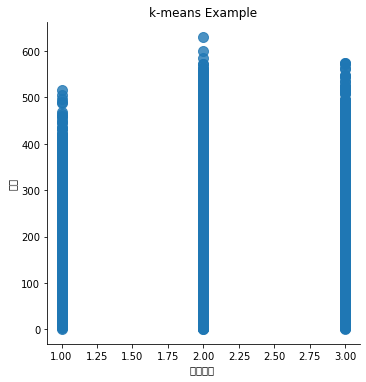

In [45]:
sb.lmplot('위험분류', '거리', data=xy, fit_reg=False, scatter_kws={"s": 100})
plt.title('k-means Example')
plt.xlabel('위험분류 ')
plt.ylabel('거리')
plt.show()

In [46]:
aiai_dorage['cluster']=kmeans.labels_
aiai_dorage.loc[200:250]

,시도,시군구,거리,위험분류,risk,cluster
200,서울특별시,중구,342.30,2,NaN,8
201,서울특별시,중구,345.67,2,NaN,8
202,서울특별시,중구,450.11,2,NaN,8
203,서울특별시,중구,452.82,3,NaN,7
204,서울특별시,중구,455.95,3,NaN,7
205,서울특별시,중구,477.84,2,NaN,8
206,서울특별시,용산구,10.43,3,NaN,5
207,서울특별시,용산구,10.64,2,NaN,0
208,서울특별시,용산구,10.64,2,NaN,0
209,서울특별시,용산구,16.86,3,NaN,5


In [48]:
aiai_dorage.to_csv("철새도래지_위험도테이블(초안).csv", encoding='utf-8-sig', index=False)